# Comparison of different loss functions


In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

## Neural network architechure

Here we use a two-layer network (one hidden layer) with hyperbolic tangent units.

In [2]:
def nn_model(w1, w2, inputs):
    z1 = w1 * inputs
    a1 = np.tanh(z1)
    z2 = w2 * a1
    scores = np.divide(1, 1 + np.exp(-z2))
    return scores

## Loss functions

In [3]:
# generating sample data
def get_data(samples):
    np.random.seed(3)
    inputs = np.random.randn(1, samples)
    labels = 1 * (np.random.rand(1, samples) > .5)
    return inputs, labels

def square_loss(w1, w2):
    inputs, labels = get_data(100)
    scores = nn_model(w1, w2, inputs)
    loss = np.sum(np.square(labels - scores)) / 100
    return loss


def cross_entropy(w1, w2):
    inputs, labels = get_data(100)
    scores = nn_model(w1, w2, inputs)
    loss = np.sum(-np.multiply(labels, np.log(scores)) - np.multiply(1 - labels, np.log(1 - scores))) / 100
    return loss


def hinge_loss(w1, w2):
    inputs, labels = get_data(100)
    scores = nn_model(w1, w2, inputs)
    loss = 1 - np.multiply(2*labels-1, scores)
    loss[loss < 0] = 0
    return np.sum(loss) / 100

## Grid

In [4]:
n = 50
m = 80
w1_list = np.linspace(-5, 5, n)
w2_list = np.linspace(-5, 5, m)

w1_grid, w2_grid = np.meshgrid(w1_list, w2_list)

ce_grid = np.zeros(w1_grid.shape)
sq_grid = np.zeros(w1_grid.shape)
hg_grid = np.zeros(w1_grid.shape)

for i in range(m):
    for j in range(len(w1_grid[i])):
        ce_grid[i][j] = cross_entropy(w1_grid[i][j], w2_grid[i][j])
        sq_grid[i][j] = square_loss(w1_grid[i][j], w2_grid[i][j])
        hg_grid[i][j] = hinge_loss(w1_grid[i][j], w2_grid[i][j])

## Comparison between cross-entropy, square loss and hinge loss

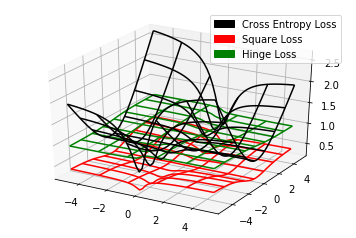

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(w1_grid, w2_grid, ce_grid, rstride=10, cstride=10, colors='k')
ax.plot_wireframe(w1_grid, w2_grid, sq_grid, rstride=10, cstride=10, colors='r')
ax.plot_wireframe(w1_grid, w2_grid, hg_grid, rstride=10, cstride=10, colors='g')

cross_entropy_patch = mpatches.Patch(color='k', label='Cross Entropy Loss')
square_loss_patch = mpatches.Patch(color='r', label='Square Loss')
hinge_loss_patch = mpatches.Patch(color='g', label='Hinge Loss')

plt.legend(handles=[cross_entropy_patch, square_loss_patch, hinge_loss_patch])

plt.show()


Cross entropy loss has less plateaus than square loss and hinge loss, therefore is much easier to train.

## Contour of cross-entropy

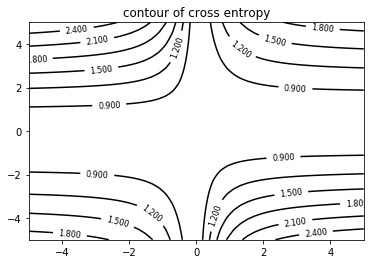

In [6]:
# Contour plot
plt.figure()
# adding the Contour lines with labels
cset = contour(w1_grid, w2_grid, ce_grid, 6, colors='k')
clabel(cset, inline=True, fontsize=8)
title('contour of cross entropy')
show()